In [30]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [31]:
class Batsman(TypedDict):

    runs :int
    balls :int
    fours:int
    sixes :int

    strike_rate:float
    balls_per_boundary :float
    boundary_percent :float
    summary :str

In [32]:
def calculate_strike_rate(state:Batsman)->Batsman:

    strike_rate = (state['runs']/state['balls'])*100

    state['strike_rate'] = strike_rate

    return {"strike_rate": strike_rate}

In [33]:
def calculate_balls_per_boundary(state:Batsman)->Batsman:

    balls_per_boundary = state['balls']/(state['fours']+state['sixes'])

    state['balls_per_boundary'] = balls_per_boundary

    return {"balls_per_boundary": balls_per_boundary}

    

In [34]:
def calculate_boundary_percent(state:Batsman)->Batsman:

    boundary_percent = (((state['fours']*4)+(state['sixes']*6))/state['runs']) *100

    state['boundary_percent'] = boundary_percent

    return {"boundary_percent": boundary_percent} 
    

In [35]:
def summary(state: Batsman) -> Batsman:
    summary_text = f"Strike Rate is ----{state['strike_rate']}\nBalls per boundary is ----{state['balls_per_boundary']}\nBoundary percentage is -----{state['boundary_percent']}"
    
    return {"summary": summary_text}

In [36]:
graph = StateGraph(Batsman)

# add node
graph.add_node("calculate_strike_rate",calculate_strike_rate)
graph.add_node("calculate_balls_per_boundary",calculate_balls_per_boundary)
graph.add_node("calculate_boundary_percent",calculate_boundary_percent)
graph.add_node("summary",summary)

# add edges

graph.add_edge(START,'calculate_strike_rate')
graph.add_edge(START,'calculate_balls_per_boundary')
graph.add_edge(START,'calculate_boundary_percent')

graph.add_edge('calculate_strike_rate','summary')
graph.add_edge('calculate_balls_per_boundary','summary')
graph.add_edge('calculate_boundary_percent','summary')

graph.add_edge('summary',END)

# compile
workflow = graph.compile()

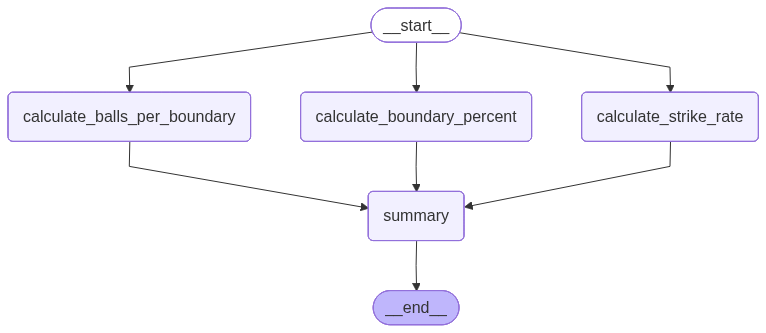

In [37]:
workflow

In [38]:
intial_state = {
    'runs':150,
    'balls':59,
    'fours':12,
    'sixes':6
}

final_state =workflow.invoke(intial_state)

print(final_state)

{'runs': 150, 'balls': 59, 'fours': 12, 'sixes': 6, 'strike_rate': 254.23728813559322, 'balls_per_boundary': 3.2777777777777777, 'boundary_percent': 56.00000000000001, 'summary': 'Strike Rate is ----254.23728813559322\nBalls per boundary is ----3.2777777777777777\nBoundary percentage is -----56.00000000000001'}
